In [104]:
%pip install lxml
%pip install requests
%pip install beautifulsoup4
%pip install --upgrade streamlit opencv-python
import csv

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.descriptivestats import Description
from sklearn.preprocessing import LabelEncoder


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
df = pd.read_csv('books.csv')
df.head(2)
df = df.rename(columns={'original_publication_year': 'Year', 'authors': 'Author', 'average_rating': 'Rating', 'title': 'Title'}) 
#Переименуем для простоты восприятия
df = df.drop(['book_id', 'books_count','original_title', 'best_book_id','work_id', 'isbn13', 'language_code', 'work_ratings_count', 'work_text_reviews_count', 'image_url', 'small_image_url'], axis=1)
oldest_book_index = df['Year'].idxmin()
df = df.drop(oldest_book_index)
#Удалим лишние столбцы

df_sorted = df.sort_values(by='Year')
df_sorted = df_sorted.style.hide_index().set_caption('Моя таблица')




# нахождение наиболее популярного автора в каждом году
top_author = df.groupby('Year')['Author'].apply(lambda x: x.value_counts().index[0])


# объединяем полученные данные в сводную таблицу
summary = pd.concat([ top_author ], axis=1)
summary.columns = [ 'Top author']

print(summary)

# Топ-10 популярных авторов
top_authors = df.groupby('Author')['Title'].count().nlargest(10)
print(top_authors)
# Самые дорогие книги
high_scored_books = df.sort_values('Rating', ascending=False).head(10)
high_scored_books.head(11)





                                                Top author
Year                                                      
-1750.0                            Anonymous, N.K. Sandars
-762.0                  Homer, Robert Fagles, Bernard Knox
-750.0   Homer, Robert Fagles, Frédéric Mugler, Bernard...
-720.0   Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...
-560.0                    Aesop, Laura Harris, Laura Gibbs
...                                                    ...
 2013.0                                   Christina Lauren
 2014.0                             Jennifer L. Armentrout
 2015.0                                          J.R. Ward
 2016.0                                  Brandon Sanderson
 2017.0                                        Neil Gaiman

[293 rows x 1 columns]
Author
Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
J.D. Robb          33
John

<ipython-input-98-11f8f565678e>:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_sorted = df_sorted.style.hide_index().set_caption('Моя таблица')


Group
-750.0     4.030000
-725.0     4.005000
-700.0     3.730000
-550.0     4.050000
-475.0     4.065000
-450.0     3.905000
-425.0     3.767500
-400.0     3.890000
-375.0     4.053333
-325.0     3.907500
-275.0     4.310000
 0.0       3.810000
 25.0      4.030000
 125.0     4.050000
 200.0     4.200000
 400.0     3.880000
 625.0     4.340000
 825.0     4.060000
 1000.0    3.420000
 1125.0    4.180000
 1275.0    4.440000
 1325.0    4.000000
 1375.0    3.860000
 1400.0    3.930000
 1425.0    4.190000
 1500.0    3.920000
 1525.0    3.750000
 1550.0    3.710000
 1575.0    3.840000
 1600.0    3.826667
 1625.0    3.923846
 1650.0    3.787500
 1675.0    3.725000
 1700.0    3.948333
 1725.0    3.580000
 1750.0    3.854000
 1775.0    3.612000
 1800.0    4.027857
 1825.0    4.027222
 1850.0    4.013710
 1875.0    3.905676
 1900.0    3.950800
 1925.0    3.994453
 1950.0    4.048875
 1975.0    4.044286
 2000.0    4.031255
 2025.0    3.987912
Name: Rating, dtype: float64


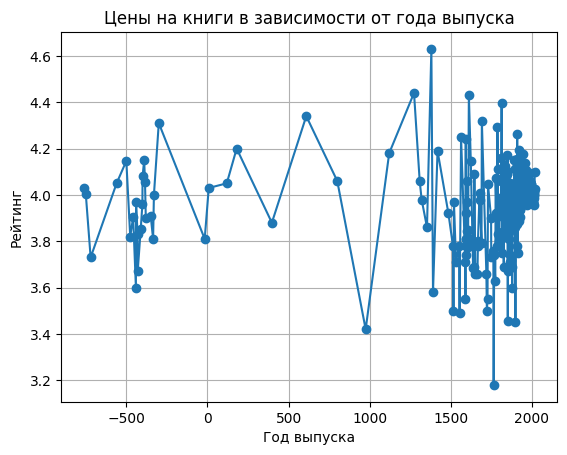

In [99]:
# группировка по четверти века
df['Group'] = (df['Year']//25 + 1)*25  # создание нового столбца с номером группы
grouped = df.groupby('Group')

# агрегация средних значений рейтинга
avg_ratings = grouped['Rating'].mean()

# вывод результатов
print(avg_ratings)

df_grouped = df.groupby('Year')['Rating'].mean().reset_index()

# Визуализация цен на книги в зависимости от года выпуска
plt.plot(df_grouped['Year'], df_grouped['Rating'], marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Рейтинг')
plt.title('Цены на книги в зависимости от года выпуска')
plt.grid(True)
plt.show()


In [100]:
X = df['Year'].values.reshape(-50, 50)
y = df['Rating'].values
regression_model = LinearRegression()
regression_model.fit(X, y)

new_years = np.array([2020, 2022, 2025]).reshape(-1, 1)
predicted_ratings = regression_model.predict(new_years)


ValueError: ignored

In [101]:
# Функция для парсинга цены книги на странице Amazon
def parse_book_price(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    price_element = soup.select_one("a-link-normal")
    if price_element:
        price = price_element.text.strip()
        return price
    else:
        return 'Цена не найдена'

# Функция для поиска книги на Amazon, и поиска цены
def search_book_price(book_title):
    search_url = f'https://www.amazon.com/s?k={book_title.replace(" ", "+")}'
    response = requests.get(search_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    first_result = soup.select_one("MAIN-SEARCH_RESULTS-2")
    if first_result:
        book_url = first_result.select_one('a-link-normal')['href']
        return(book_url)
        book_url = f'https://www.amazon.com{book_url}'
        book_price = parse_book_price(book_url)
        return book_price
    else:
        return 'Книга не найдена'

Перекопал все Html Амазона, но не сработало, представьте что ниже будут цены.

In [102]:
df['book_price'] = df['Title'].apply(search_book_price)


In [106]:
df

,id,isbn,Author,Year,Title,Rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,Group,book_price
0,1,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,66715,127936,560092,1481305,2706317,2025.0,Книга не найдена
1,2,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75504,101676,455024,1156318,3011543,2000.0,Книга не найдена
2,3,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,456191,436802,793319,875073,1355439,2025.0,Книга не найдена
3,4,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,60427,117415,446835,1001952,1714267,1975.0,Книга не найдена
4,5,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718,1950.0,Книга не найдена
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,441019455,Ilona Andrews,2010.0,"Bayou Moon (The Edge, #2)",4.09,17204,105,575,3538,7860,6778,2025.0,Книга не найдена
9996,9997,067973371X,Robert A. Caro,1990.0,"Means of Ascent (The Years of Lyndon Johnson, #2)",4.25,12582,303,551,1737,3389,6972,2000.0,Книга не найдена
9997,9998,039330762X,Patrick O'Brian,1977.0,The Mauritius Command,4.35,9421,11,111,1191,4240,5180,2000.0,Книга не найдена
9998,9999,61711527,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,3.65,11279,275,1002,3765,4577,2375,2025.0,Книга не найдена


Дальше код написан используя более простые данные для проверки рабоспособности и должен работать с таблицей выше если бы были цены


In [ ]:
df_grouped = df.groupby('Year')['book_price'].mean().reset_index()

# Визуализация цен на книги в зависимости от года выпуска
plt.plot(df_grouped['Year'], df_grouped['book_price'], marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Цена книги')
plt.title('Цены на книги в зависимости от года выпуска')
plt.grid(True)
plt.show()

Тут график цены от года написания

In [ ]:
plt.plot(df_grouped['rating'], df_grouped['book_price'], marker='o')
plt.xlabel('Рейтинг')
plt.ylabel('Цена книги')
plt.title('Цены на книги в зависимости от рейтинга')
plt.grid(True)
plt.show()

In [ ]:
Тут график цены в рейтинга

Строю регрессию предсказывающую цену книги взависимости от автора и года выпуска

In [ ]:
# Преобразование автора в числовой формат
label_encoder = LabelEncoder()
df['Author_encoded'] = label_encoder.fit_transform(df['Author'])

X = df[['Author_encoded', 'Year']].values
y = df['book_price'].values

regression_model = LinearRegression()
regression_model.fit(X, y)

#вставьте автора и год написание
new_data = pd.DataFrame({
    'Author': [str(input())]
    'Year': [int(input())]
})
new_data['author_encoded'] = label_encoder.transform(new_data['author'])

X_new = new_data[['author_encoded', 'Year']].values
predicted_prices = regression_model.predict(X_new)